### DAT Final Project: Telco Customer Churn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
file = 'Telco-Customer-Churn.csv'
cust = pd.read_csv(file)

-----

## Exploratory Data Analysis

In [6]:
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
cust.shape

(7043, 21)

In [11]:
cust['Churn_Numeric'] = cust.Churn.map({'No':0, 'Yes':1})

In [12]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

---

### Compare Feature Behavior between Churn Customters

In [13]:
cust.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
lost = cust.loc[cust['Churn'] == 'Yes']

In [15]:
kept = cust.loc[cust['Churn'] == 'No']

In [16]:
lost.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Numeric
count,1869.000000,1869.000000,1869.000000,1869.0
mean,0.254682,17.979133,74.441332,1.0
std,0.435799,19.531123,24.666053,0.0
min,0.000000,1.000000,18.850000,1.0
25%,0.000000,2.000000,56.150000,1.0
50%,0.000000,10.000000,79.650000,1.0
75%,1.000000,29.000000,94.200000,1.0
max,1.000000,72.000000,118.350000,1.0


In [17]:
kept.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn_Numeric
count,5174.000000,5174.000000,5174.000000,5174.0
mean,0.128721,37.569965,61.265124,0.0
std,0.334923,24.113777,31.092648,0.0
min,0.000000,0.000000,18.250000,0.0
25%,0.000000,15.000000,25.100000,0.0
50%,0.000000,38.000000,64.425000,0.0
75%,0.000000,61.000000,88.400000,0.0
max,1.000000,72.000000,118.750000,0.0


In [18]:
cust.TotalCharges.tail(10)

7033    2625.25
7034    6886.25
7035     1495.1
7036      743.3
7037     1419.4
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, dtype: object

In [19]:
def emptystr(x):
    try:
        return float(x)
    except:
        return 0
#how to get rid of empty strings

In [20]:
cust["TotalCharges"]= cust.TotalCharges.apply(emptystr)

In [21]:
float(np.nan)

nan

In [22]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

In [23]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Churn_Numeric       7043 non-nul

In [24]:
cust.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_Numeric
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


---

## Feature Selection

### Demographics Analysis

**Marital Status**

In [25]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

In [26]:
lost.Partner.value_counts(ascending = True)

Yes     669
No     1200
Name: Partner, dtype: int64

In [27]:
1200/(699+1200)

0.631911532385466

In [28]:
kept.Partner.value_counts(ascending = False)

Yes    2733
No     2441
Name: Partner, dtype: int64

In [29]:
2441/(2733+2441)

0.4717819868573637

**Gender**

In [30]:
lost.gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [31]:
939/(939+930)

0.5024077046548957

In [32]:
kept.gender.value_counts()

Male      2625
Female    2549
Name: gender, dtype: int64

In [33]:
2549/(2625+2549)

0.49265558562040973

**Senior Citizen**

In [34]:
lost.SeniorCitizen.value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [35]:
476/(1393+476)

0.2546816479400749

In [36]:
kept.SeniorCitizen.value_counts()

0    4508
1     666
Name: SeniorCitizen, dtype: int64

In [37]:
666/(4508+666)

0.12872052570545034

**Dependents**

In [38]:
lost.Dependents.value_counts()

No     1543
Yes     326
Name: Dependents, dtype: int64

In [39]:
326/(1543+326)

0.17442482611021937

In [40]:
kept.Dependents.value_counts()

No     3390
Yes    1784
Name: Dependents, dtype: int64

In [41]:
1784/(1784+3390)

0.3448009277155006

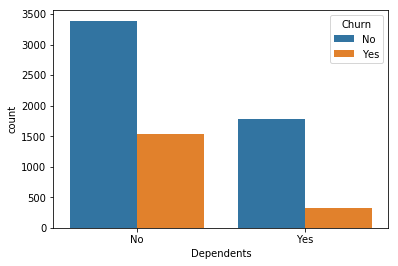

In [42]:
sns.countplot(cust.Dependents, hue=cust.Churn)

**Number of Serivices**

In [43]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric'],
      dtype='object')

In [44]:
services = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

In [45]:
cust["TotalServices"]=cust.loc[:,services].replace({'Yes':1,'No':0, 'DSL':1,"Fiber optic":2,"No internet service":0,"No phone service":0}).sum(axis=1)

In [46]:
cust.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Numeric,TotalServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,3
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,7
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0,6
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0,2
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,8
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,0,4


In [47]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric', 'TotalServices'],
      dtype='object')

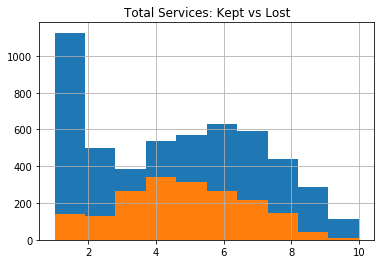

In [48]:
cust.groupby("Churn").TotalServices.hist()
plt.title('Total Services: Kept vs Lost');

In [49]:
lost = cust.loc[cust['Churn'] == 'Yes']

In [50]:
kept = cust.loc[cust['Churn'] == 'No']

In [51]:
lost.TotalServices.sum()

8907

In [52]:
kept.TotalServices.sum()

23391

**Type of Internet Service**

In [203]:
kept.InternetService.value_counts()

DSL            1962
Fiber optic    1799
No             1413
Name: InternetService, dtype: int64

In [156]:
lost.InternetService.value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

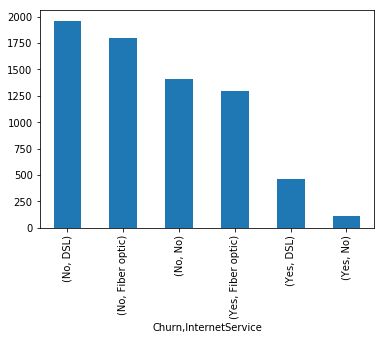

In [206]:
cust.groupby('Churn')['InternetService'].value_counts().plot(kind = 'bar')

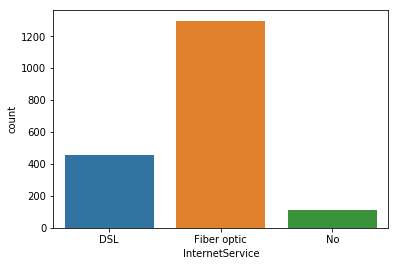

In [208]:
sns.countplot(lost.InternetService)

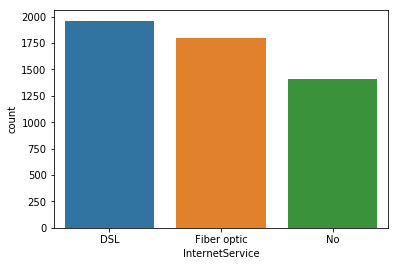

In [209]:
sns.countplot(kept.InternetService)

**Tenure**

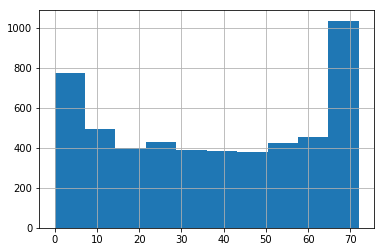

In [211]:
kept.tenure.hist()

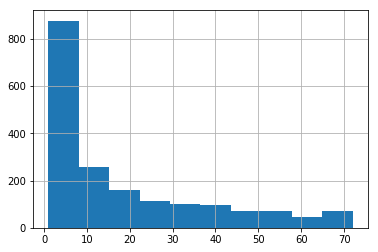

In [212]:
lost.tenure.hist()

### Cost Comparision

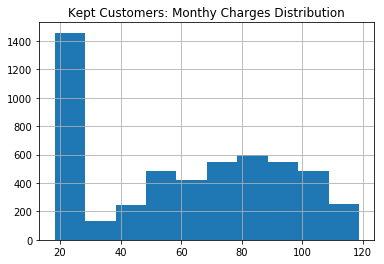

In [55]:
kept.MonthlyCharges.hist()
plt.title('Kept Customers: Monthy Charges Distribution');

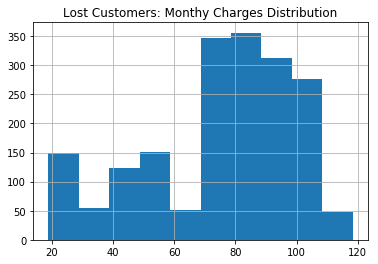

In [56]:
lost.MonthlyCharges.hist()
plt.title('Lost Customers: Monthy Charges Distribution');

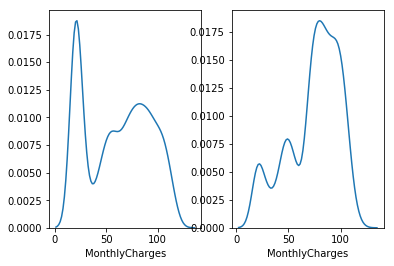

In [57]:
fig,ax=plt.subplots(nrows=1, ncols=2)
#ax[0].hist(kept.MonthlyCharges)
#ax[1].hist(lost.MonthlyCharges)
sns.distplot(kept.MonthlyCharges, ax=ax[0], hist=False)
sns.distplot(lost.MonthlyCharges, ax=ax[1],hist=False)

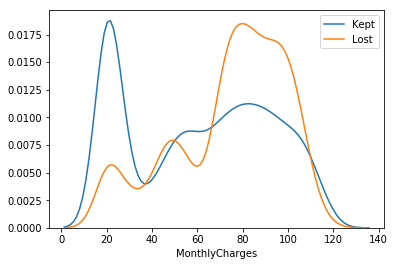

In [58]:
sns.distplot(kept.MonthlyCharges,hist=False, label="Kept")
sns.distplot(lost.MonthlyCharges,hist=False, label = "Lost")

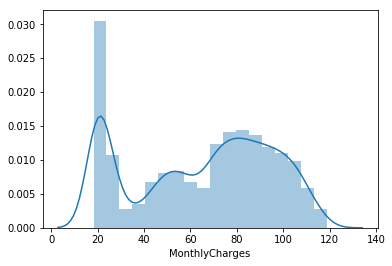

In [59]:
sns.distplot(cust.MonthlyCharges)

**Billing Methods**

In [60]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Numeric', 'TotalServices'],
      dtype='object')

**Contract Type**

In [61]:
kept.Contract.value_counts()

Month-to-month    2220
Two year          1647
One year          1307
Name: Contract, dtype: int64

In [62]:
1647/(2220+1647+1307)

0.3183223811364515

In [63]:
2220/(2220+1647+1307)

0.4290684190181678

In [64]:
lost.Contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [65]:
48/(1655+166+48)

0.025682182985553772

In [66]:
1655/(1655+166+48)

0.8855002675227395

**Paperless Billing**

In [67]:
kept.PaperlessBilling.value_counts()

Yes    2771
No     2403
Name: PaperlessBilling, dtype: int64

In [68]:
2771/(2771+2403)

0.5355624275222265

In [69]:
lost.PaperlessBilling.value_counts()

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64

In [70]:
1400/(1400+469)

0.7490636704119851

In [71]:
kept.PaymentMethod.value_counts()

Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1290
Bank transfer (automatic)    1286
Name: PaymentMethod, dtype: int64

In [72]:
2576/(1304+1294+1290+1286)

0.4978739853111712

In [73]:
1294+1304

2598

In [74]:
lost.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [75]:
490/(1071+308+258+232)

0.26217228464419473

In [76]:
1071+308


1379

# ---



**Confirmed List of Valid Feaures**

1. SeniorCitizen
2. Partner'
3. Dependents
4. TotalServices
5. MonthlyCharges
6. Contract
7. PaymentMethod
8. Tenure

-------------------------

# Modeling

## Linear Regression

In [158]:
feature_cols = ['SeniorCitizen','Partner','Dependents','tenure','TotalServices','MonthlyCharges','Contract','PaymentMethod','TotalCharges']

In [159]:
y = cust['Churn_Numeric']

In [160]:
X =cust.loc[:,feature_cols].replace({'Month-to-month':1,'One year':1,'Two year':2,'Yes':1,'No':0, 'Electronic check':0,"Mailed check":0,"Bank transfer (automatic)":1,"Credit card (automatic)":1})


In [161]:
#X = cust[feature_cols]
y = cust.Churn_Numeric

In [162]:
lr = LinearRegression()

In [163]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [164]:
X

,SeniorCitizen,Partner,Dependents,tenure,TotalServices,MonthlyCharges,Contract,PaymentMethod,TotalCharges
0,0,1,0,1,2,29.85,1,0,29.85
1,0,0,0,34,4,56.95,1,0,1889.50
2,0,0,0,2,4,53.85,1,0,108.15
3,0,0,0,45,4,42.30,1,1,1840.75
4,0,0,0,2,3,70.70,1,0,151.65
5,0,0,0,8,7,99.65,1,0,820.50
6,0,0,1,22,6,89.10,1,1,1949.40
7,0,0,0,10,2,29.75,1,0,301.90
8,0,1,0,28,8,104.80,1,0,3046.05
9,0,0,1,62,4,56.15,1,1,3487.95


In [165]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
lr.coef_

array([ 7.99465458e-02,  3.63452120e-03, -3.84386506e-02, -1.72241449e-03,
       -6.20046037e-02,  1.05361936e-02, -2.71800658e-02, -5.09995689e-02,
       -5.61292556e-05])

In [167]:
pd.DataFrame({'coefs': lr.coef_, 'features': feature_cols})

,coefs,features
0,0.079947,SeniorCitizen
1,0.003635,Partner
2,-0.038439,Dependents
3,-0.001722,tenure
4,-0.062005,TotalServices
5,0.010536,MonthlyCharges
6,-0.027180,Contract
7,-0.051000,PaymentMethod
8,-0.000056,TotalCharges


In [168]:
lr.intercept_

0.10380690412911608

In [169]:
predictions = lr.predict(X)

## Model Comparison

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [174]:
from sklearn.model_selection import train_test_split

---

### Decision Tree

In [173]:
tree = DecisionTreeClassifier(max_depth=4)

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

In [176]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [177]:
tree.score(X_test,Y_test)

0.778534923339012

In [213]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.47130544, 0.        ,
       0.3542137 , 0.10720429, 0.03512951, 0.03214705])

In [214]:
pd.DataFrame({"Tree Model":tree.feature_importances_, "Col":X.columns})

,Tree Model,Col
0,0.000000,SeniorCitizen
1,0.000000,Partner
2,0.000000,Dependents
3,0.471305,tenure
4,0.000000,TotalServices
5,0.354214,MonthlyCharges
6,0.107204,Contract
7,0.035130,PaymentMethod
8,0.032147,TotalCharges


In [178]:
y.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn_Numeric, dtype: float64

---

### Random Forest

In [179]:
forest = RandomForestClassifier(max_depth=3)

In [180]:
forest.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [181]:
forest.score(X_test,Y_test)

0.7603634298693924

In [182]:
forest.feature_importances_

array([2.72545130e-02, 4.28815992e-03, 4.28852435e-05, 2.72634957e-01,
       9.02762786e-02, 1.25145114e-01, 2.24891281e-01, 8.88841432e-02,
       1.66582667e-01])

In [183]:
pd.DataFrame({"I":forest.feature_importances_, "Col":X.columns})

,I,Col
0,0.027255,SeniorCitizen
1,0.004288,Partner
2,0.000043,Dependents
3,0.272635,tenure
4,0.090276,TotalServices
5,0.125145,MonthlyCharges
6,0.224891,Contract
7,0.088884,PaymentMethod
8,0.166583,TotalCharges


---

### Gradient Boosting

In [184]:
grad = GradientBoostingClassifier()

In [185]:
grad.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [186]:
grad.score(X_test,Y_test)

0.7887563884156729

In [187]:
grad.feature_importances_

array([0.02430737, 0.0005051 , 0.00737695, 0.40886807, 0.02289337,
       0.32675313, 0.09493441, 0.01562443, 0.09873716])

In [188]:
pd.DataFrame({"I":grad.feature_importances_, "Col":X.columns})

,I,Col
0,0.024307,SeniorCitizen
1,0.000505,Partner
2,0.007377,Dependents
3,0.408868,tenure
4,0.022893,TotalServices
5,0.326753,MonthlyCharges
6,0.094934,Contract
7,0.015624,PaymentMethod
8,0.098737,TotalCharges


---

### Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
logreg = LogisticRegression()

In [192]:
logreg.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [193]:
logreg.score(X_test,Y_test)

0.7921635434412265

In [194]:
y.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn_Numeric, dtype: float64

In [195]:
logreg.coef_

array([[ 3.70829559e-01, -1.50783428e-02, -3.19452966e-01,
        -5.69577986e-02, -3.16517024e-01,  4.46751881e-02,
        -8.67484693e-01, -3.64787017e-01,  2.39595867e-04]])

In [197]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'TotalServices',
       'MonthlyCharges', 'Contract', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [154]:
logreg.intercept_

array([-0.50464862])

---

## Findings

- Logistical Regression had the highest score about the several Models with a 79% Prediction rate.

- The factors affecting Churn (in order of importance):
    - **Monthly Charges**
    - **Customer is a Senior Citizen**
    -  **Total Charges**
    
- Other models also found the following factors impacting Churn:
    - **Tenure**
    - **Contract**

## Suggestion to the Business 

- ### Special Offers to New Customers: 

    - Target customers within the first 10 Months of their Tenure
    - Promote a 2-year Contract
    - With a fixed monthly charge at or below 61.00
    - 61.00 is the average monthly amount of a customer that stayed with the company
    
    
- ### Special Senior Citizen Discount:

    - 25% of customer that ended their service were Senior Citizen. That is double the portion of customer that stayed.
    - Presumably Senior Citizen have a hard time paying the monthly charges.
    - Thus, a standard Senior Citizen discount rate can be applied.
    
 